In [35]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/Big_analytics_project/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,...,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,...,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,...,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.9,Saturday,January,2,394,...,859493,95,9090,596341,79,11,11,13,6,33
3,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.10,Sunday,January,3,205,...,859493,95,9090,596341,79,11,11,13,6,33
4,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.11,Monday,January,4,246,...,859493,95,9090,596341,79,11,11,13,6,33


#### 수익성-규모 분석
* 참고 문헌: 개봉 규모와 수익성에 따른 영화의 분류와 확산 패턴 분석


#### 규모: 개봉일의 좌석 수를 영화의 규모를 측정하는 대용 척도(proxy measure)로 선정하였다. -> 개봉일의 좌석수를 영화의 규모에 대한 척도로 사용한 이유
* 1. 영화의 제작비가 개봉 이전에 결정되는 요인이라는 점
* 2. 개봉일의 상용관 수 혹은 좌석의 수 경우, 많은 연구에서 영화의 배급력을 나타내는 변수
* 3. 무엇보다 제작자 및 배급사의 입장에서 제작 규모에 따라, 이 두 변수가 제작 규모를 적절히 반영할 것으로 기대할 수 있다.
* 4. 마지막으로, 상영관 수와 좌석 수 모두 영화의 규모를 반영하고 있지만, 멀티플렉스가 대부분인 한국 영화 시장의 특성을 고려할때(전체 상영관 수의 94.5%),규모가 큰 영화일수록 좌석 수가 많은 대형 상영관에 배정된다는 점과 제작비가 높은 3D 영화와 IMAX 영화의 경우 역시 해당 포맷을 위한 상영관이 모두 많은 좌석 수를 가진 점에 주목하였다

In [36]:
# 영화별 개봉일의 좌석수
df_규모_수익성 = pd.DataFrame()
df_규모_수익성['movie_title'] = df['movie_title'].unique()

In [37]:
# 15번째마다 행 남기기
df_규모_수익성 = pd.merge(df[::15][['좌석수', 'movie_title']], df_규모_수익성, on='movie_title', how='left').copy()

#### 수익성: 일반적으로, 특정 상품이나 프로젝트 등 투자 대상의 수익성은 투자 규모에 대비한 매출로서 평가된다. 따라서 본 연구에서는 이와 같은 기준으로 사용하여 2주간의 누적 매출를 제작 규모인 개봉일의 좌석수로 나눈 값을 수익성의 척도로 정의하였다.

In [38]:
# 1. 영화별 누적 관객수를 계산
sum_viewer = df.groupby('movie_title')['매출액'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df['누적_매출액'] = df['movie_title'].map(sum_viewer)

In [39]:
df_규모_수익성 = pd.merge(df[['movie_title','누적_매출액']], df_규모_수익성, on='movie_title', how='left').copy()

In [40]:
# 영화별로 묶기
df_규모_수익성 = df_규모_수익성.groupby(['movie_title']).mean()

# 수익성
df_규모_수익성['수익성'] = df_규모_수익성['누적_매출액'] / df_규모_수익성['좌석수']

In [42]:
df_규모_수익성.rename(columns={'좌석수':'규모(좌석수)'}, inplace=True)
df_규모_수익성.drop('누적_매출액', axis=1, inplace=True)
df_규모_수익성

,규모(좌석수),수익성
movie_title,,
0.0MHz,123789.0,8479.431775
12 솔져스,138259.0,12625.869564
1987,1070761.0,34097.398702
1급기밀,203601.0,8067.636701
23 아이덴티티,323402.0,39463.714000
...,...,...
혹성탈출: 종의 전쟁,865589.0,18835.825060
혼숨,118636.0,18611.816995
후드,305002.0,7043.529711


/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_34343/3443996162.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_규모_수익성['규모(좌석수)'])


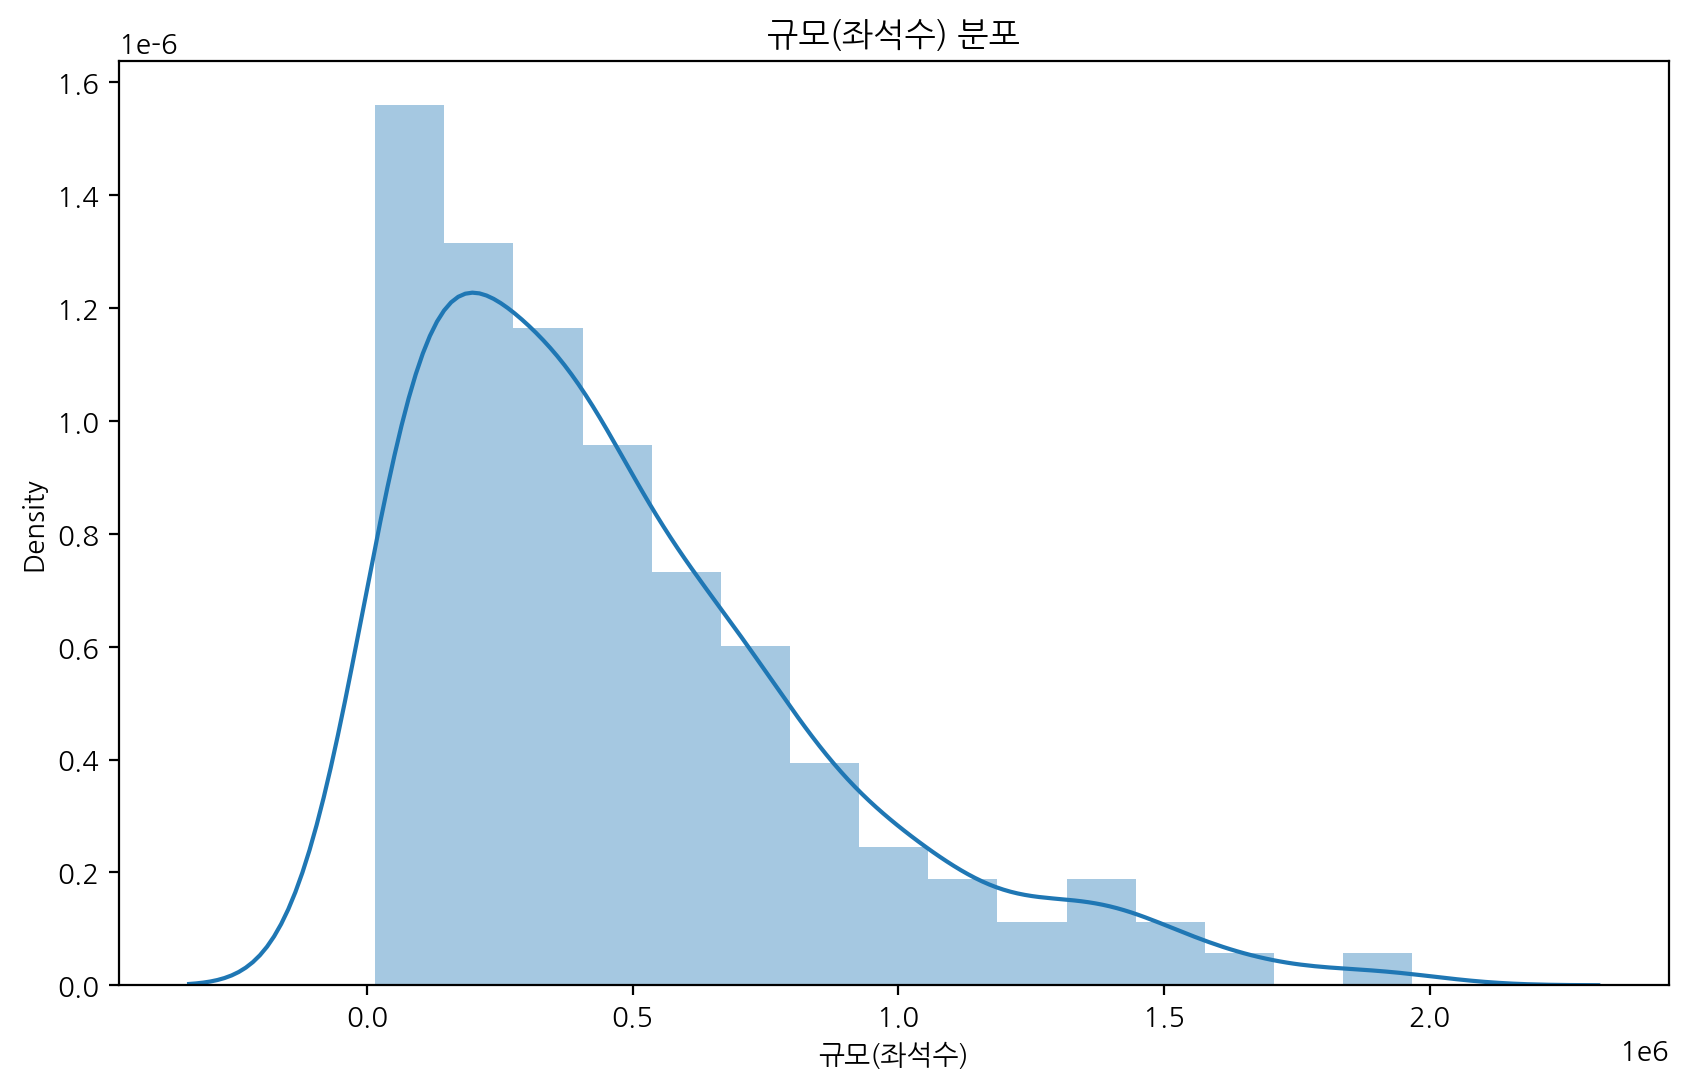

In [44]:
# 규모의 분포
plt.figure(figsize=(10, 6))
sns.distplot(df_규모_수익성['규모(좌석수)'])
plt.title('규모(좌석수) 분포')
plt.show()

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_34343/1484571289.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_규모_수익성['수익성'])


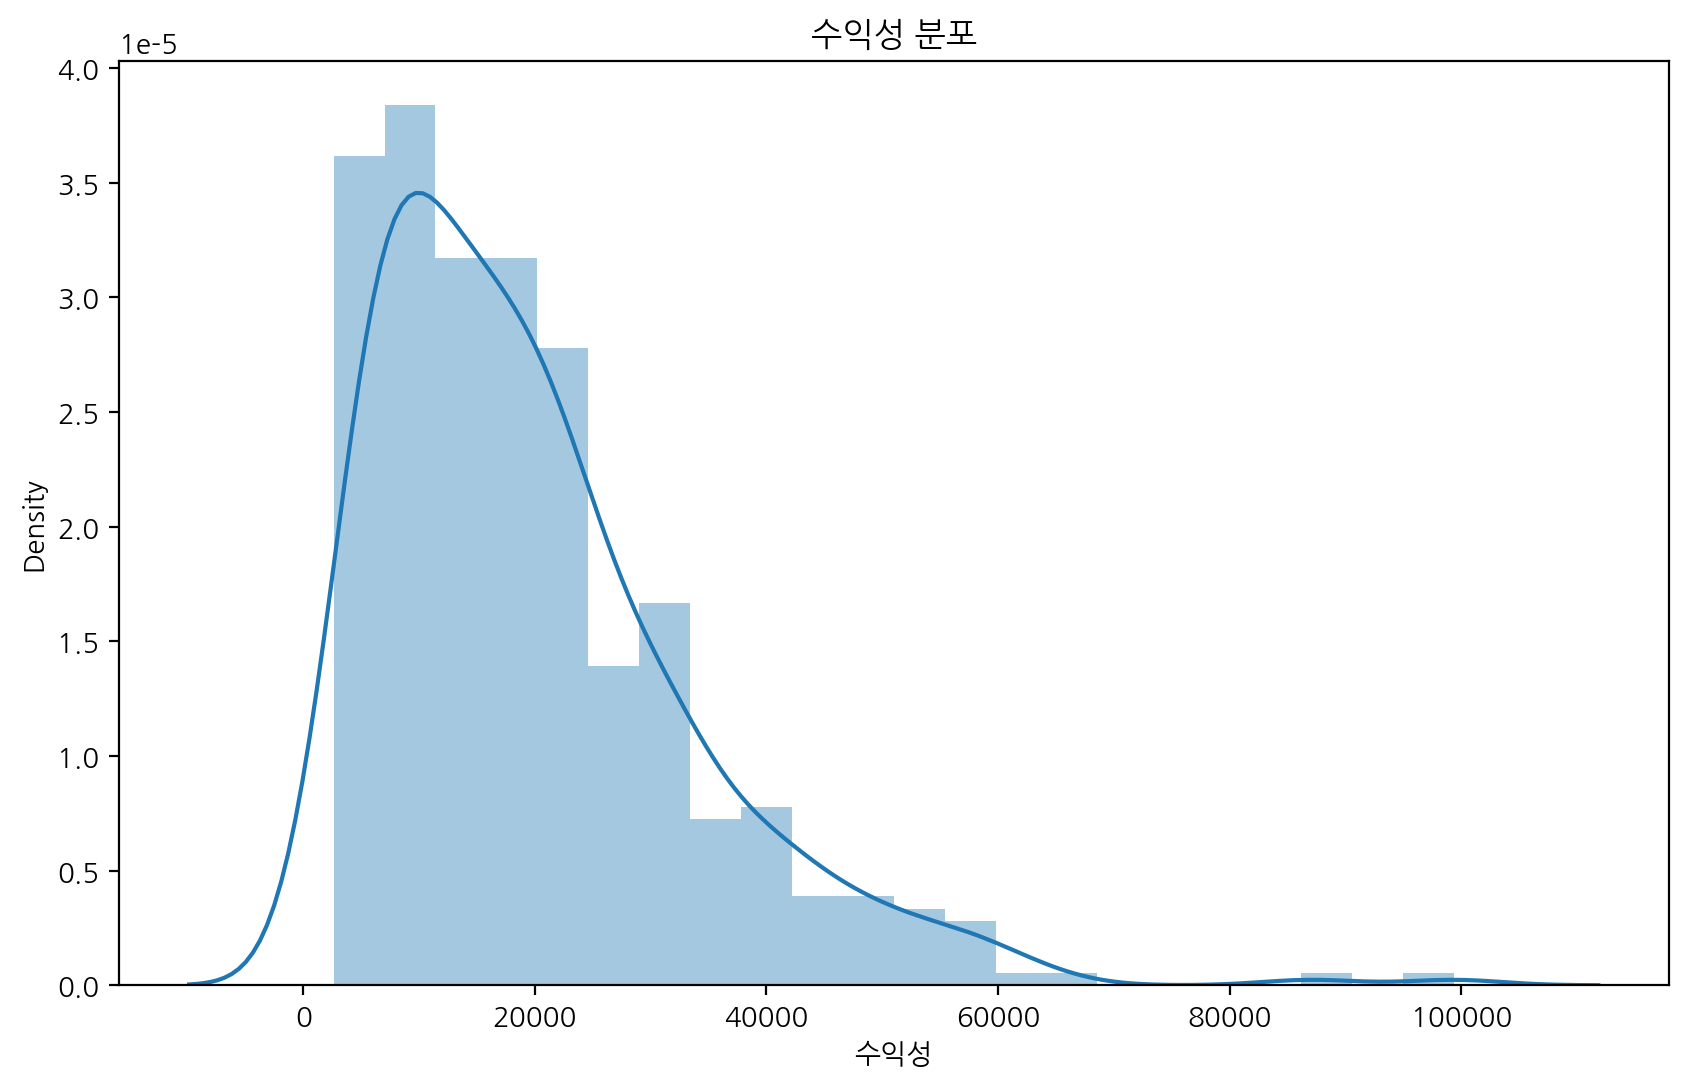

In [45]:
# 수익성의 분포
plt.figure(figsize=(10, 6))
sns.distplot(df_규모_수익성['수익성'])
plt.title('수익성 분포')
plt.show()

#### 1. 두개의 축으로 산점도 그리기

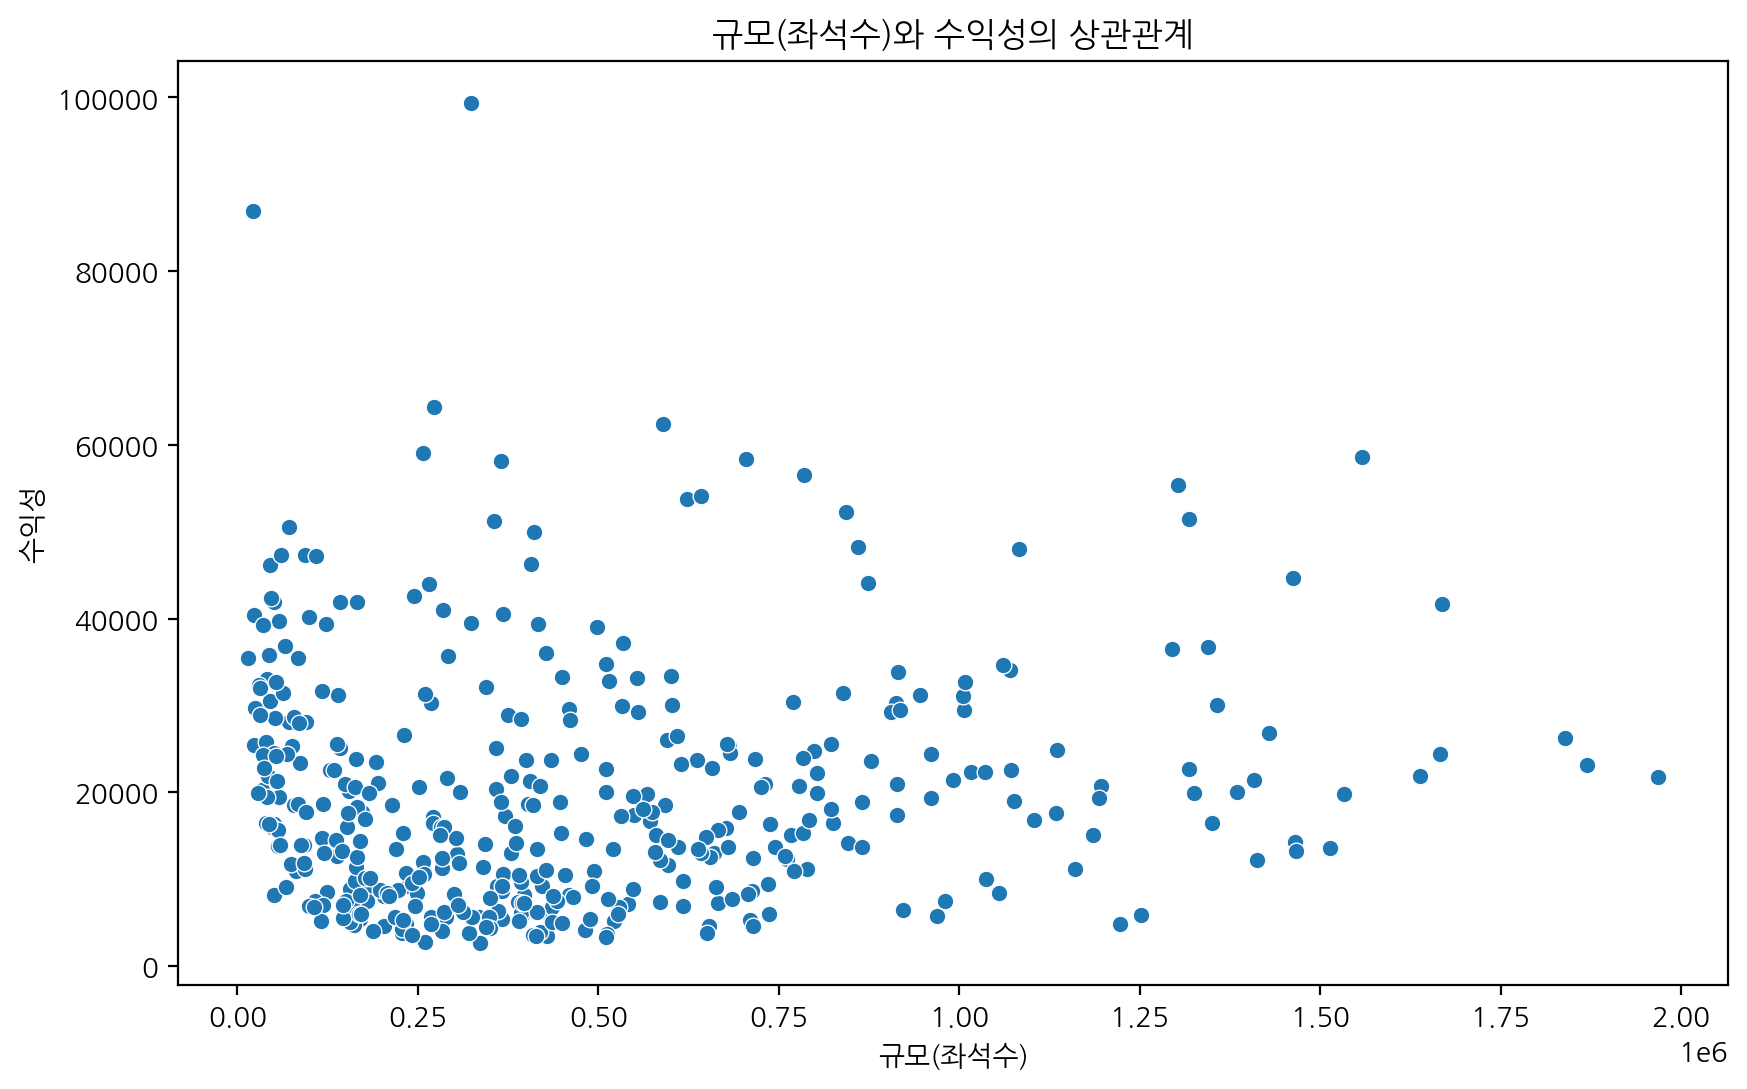

In [43]:
# 규모(좌석수)와 수익성의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성')
plt.title('규모(좌석수)와 수익성의 상관관계')
plt.show()

#### min-max를 통한 정규화를 한 다음 -> k-means_clustering

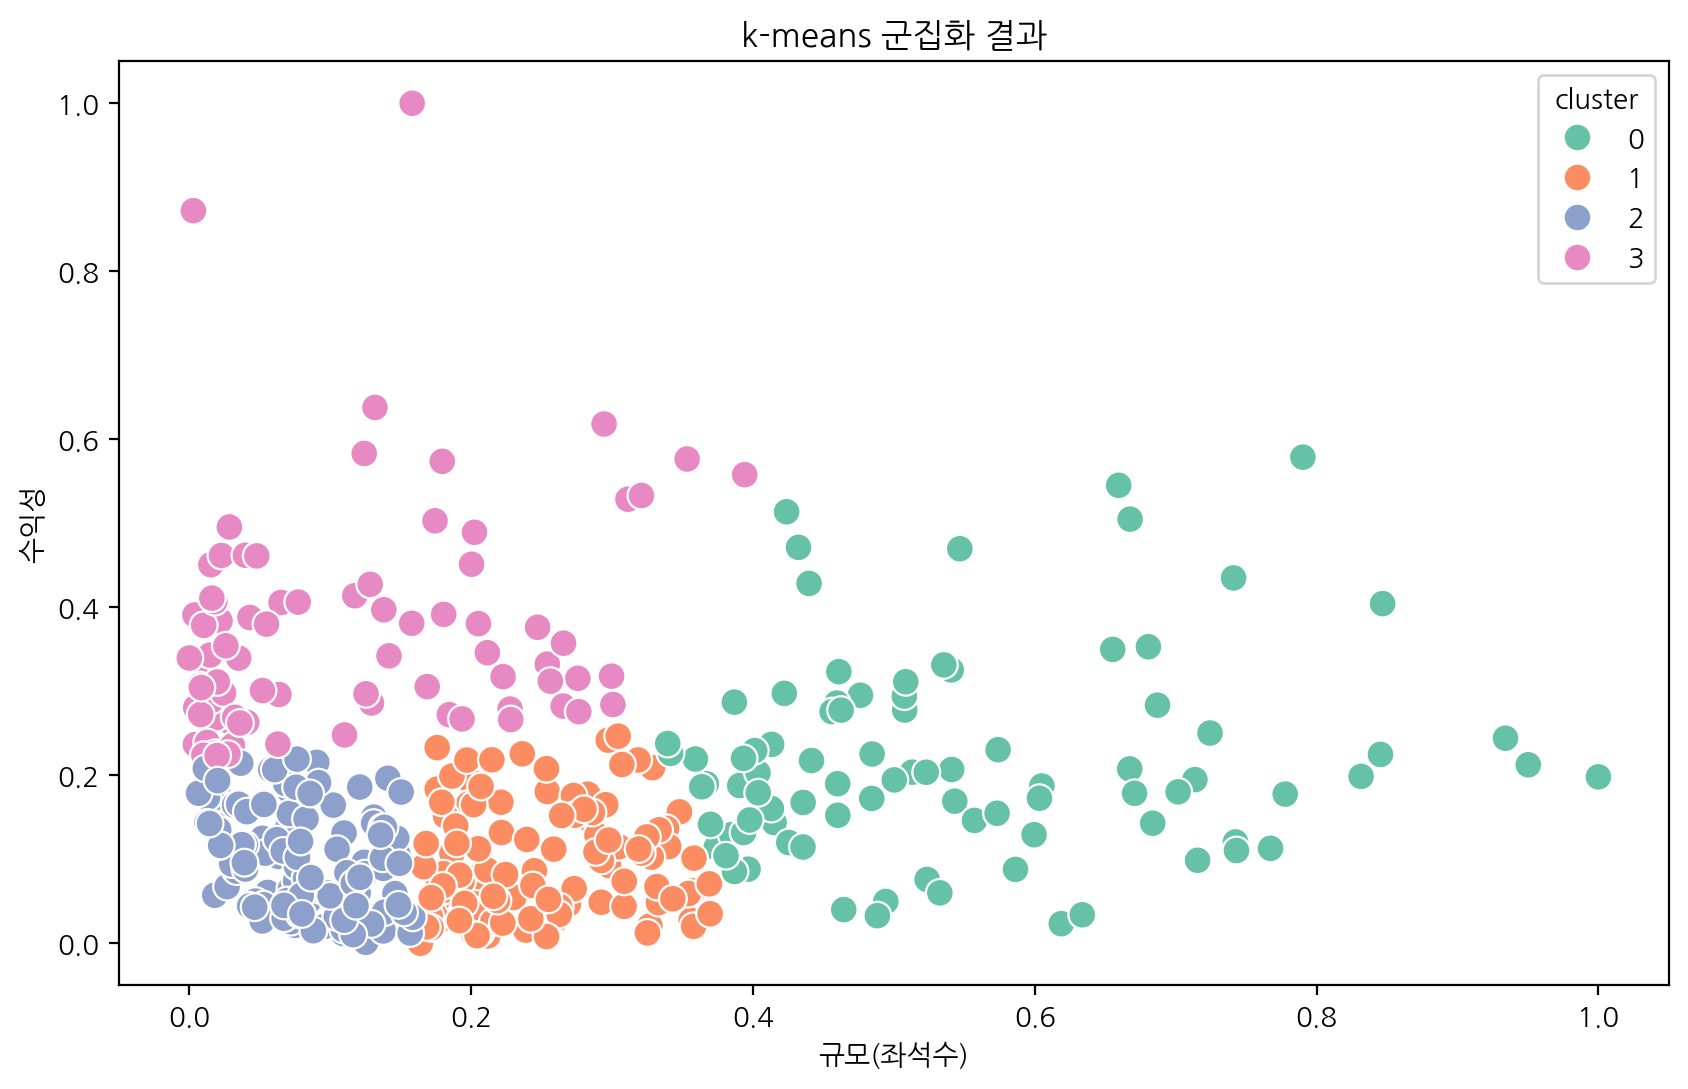

In [48]:
# min-max 정규화
df_규모_수익성['규모(좌석수)'] = (df_규모_수익성['규모(좌석수)'] - df_규모_수익성['규모(좌석수)'].min()) / (df_규모_수익성['규모(좌석수)'].max() - df_규모_수익성['규모(좌석수)'].min())
df_규모_수익성['수익성'] = (df_규모_수익성['수익성'] - df_규모_수익성['수익성'].min()) / (df_규모_수익성['수익성'].max() - df_규모_수익성['수익성'].min())

# k-means 군집화
from sklearn.cluster import KMeans

# k-means 모델 생성
kmeans = KMeans(n_clusters=4, random_state=123)

# 모델 학습
kmeans.fit(df_규모_수익성)

# 군집 결과
df_규모_수익성['cluster'] = kmeans.labels_

# 군집 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성', hue='cluster', palette='Set2', s=100)
plt.title('k-means 군집화 결과')
plt.show()

In [50]:
# 군집별 통계량
df_규모_수익성.groupby('cluster').mean()

# 군집 개수
df_규모_수익성['cluster'].value_counts()

cluster
2    121
1    117
0     90
3     81
Name: count, dtype: int64

* Cluster 0:
    * 규모(좌석수)가 가장 큼 (54.1%).
    * 수익성은 두 번째로 높음 (21.6%).

* Cluster 1:
    * 규모(좌석수)가 중간 크기 (24.8%).
    * 수익성은 가장 낮음 (9.4%).

* Cluster 2:
    * 규모(좌석수)가 두 번째로 작음 (8.2%).
    * 수익성은 Cluster 1보다 높지만 상대적으로 낮음 (9.9%).

* Cluster 3:
    * 규모(좌석수)가 가장 작음 (11.5%).
    * 수익성이 가장 높음 (37.1%).

#### 군집별 회귀 모델을 돌릴 수 있을까? 혹은 군집별 누적 관객수 추이를 볼 수 있을까?

In [52]:
df_규모_수익성_0 = df_규모_수익성[df_규모_수익성['cluster'] == 0]
df_규모_수익성_1 = df_규모_수익성[df_규모_수익성['cluster'] == 1]
df_규모_수익성_2 = df_규모_수익성[df_규모_수익성['cluster'] == 2]
df_규모_수익성_3 = df_규모_수익성[df_규모_수익성['cluster'] == 3]

In [53]:
df_규모_수익성_0

,규모(좌석수),수익성,cluster
movie_title,,,
1987,0.540727,0.325407,0
PMC: 더 벙커,0.415006,0.143743,0
가디언즈 오브 갤럭시 VOL. 2,0.543225,0.169128,0
강철비,0.476288,0.295287,0
검사외전,0.667653,0.504890,0
...,...,...,...
퍼스트맨,0.464435,0.040062,0
퍼시픽 림: 업라이징,0.532623,0.059967,0
프리즌,0.393327,0.220096,0


In [54]:
df_규모_수익성_1

,규모(좌석수),수익성,cluster
movie_title,,,
7년의 밤,0.269058,0.046577,1
7호실,0.213390,0.035183,1
가려진 시간,0.356117,0.027195,1
갓 오브 이집트,0.221542,0.131809,1
걸캅스,0.236323,0.225511,1
...,...,...,...
허스토리,0.191654,0.026989,1
헌츠맨: 윈터스 워,0.215796,0.055963,1
헬보이,0.171699,0.054253,1


In [55]:
df_규모_수익성_2

,규모(좌석수),수익성,cluster
movie_title,,,
0.0MHz,0.055572,0.060511,2
12 솔져스,0.062985,0.103386,2
1급기밀,0.096461,0.056253,2
47 미터,0.130891,0.150170,2
50가지 그림자: 심연,0.083513,0.061598,2
...,...,...,...
허리케인 하이스트,0.118287,0.044663,2
호두까기 인형과 4개의 왕국,0.085729,0.178318,2
혼숨,0.052932,0.165282,2


In [56]:
df_규모_수익성_3

,규모(좌석수),수익성,cluster
movie_title,,,
23 아이덴티티,0.157838,0.380896,3
가버나움,0.004279,0.236522,3
겟 아웃,0.222644,0.317403,3
곤지암,0.275752,0.315429,3
공범자들,0.012824,0.315181,3
...,...,...,...
페르디난드,0.051918,0.300807,3
포켓몬 더 무비 XY&Z 「볼케니온 : 기계왕국의 비밀」,0.015994,0.410861,3
플립,0.035900,0.262190,3


#### 가설 검증
* 1. 군집별 매출액? 수익성?은 영화의 내적 특성에 영향을 받는다.
* 2. 군집별 매출액? 수익성?은 스크린수에 영향을 받는다.
* 3. 군집별 매출액? 수익성?은 구전효과에 영향을 받는다.

5. 결 론
우리는 통합전산망에서 공인하여 제공하는, 신뢰성 있는 일별
박스오피스 데이터를 이용하여 영화의 수요 확산 패턴을 분석
하였다. 영화의 규모와 성공 및 실패 여부에 따른 확산 패턴의
차이점을 알아보기 위하여, 본 연구에서는 개봉일의 좌석 수
로 정의된 개봉 규모와 최종 박스오피스 수입을 개봉 규모로
나눈 수익성 지표를 정의하고, 그에 따라 수집된 영화들에 대
한 군집분석을 수행하였다. 군집분석의 결과, 선택된 영화들
은 각각의 기준에 대해 두 가지 수준을 갖는, 총 네 개의 군집
을 이루었다.
분석 대상인 영화의 특성을 고려하여 확장 Bass 모형이 확산
패턴 분석을 위해 선택되어 개별 영화의 박스오피스를 기반으
로 추정하였다. 그 결과, 각각의 군집은 확산 패턴 측면에서 다
음과 같은 몇 가지 차이를 보여주었다. 첫 번째로, 입소문 효과
를 의미하는 확산 계수의 비율 는 수익성이 높은 군집들에
서 높게 나타난다. 이는 영화의 수익성이 입소문 효과와 밀접
한 관련이 있다는 것을 의미하며, 특히 중규모-고수익성 군집
에서 가장 높고 중규모 두 군집간의 차이가 대규모에서보다
크다는 사실은 매스 미디어 노출이 관객과의 주요 통로가 되
는 대규모 영화에 비해 중규모 영화에 있어서 입소문 효과의
중요성이 더욱 크다는 것을 나타낸다. 또한, 수익성이 낮은 영
화들의 일별 박스오피스 확산 패턴 상 최대 시점과 포화 시점
및 두 시점 간의 간격이 짧다는 것은 수익성이 낮은 영화들의
짧은 상영 기간을 설명해 주고 있다. 마지막으로, 확장 Bass 모
형 상의 특성인 초기 수요가 수익성이 낮은 영화들에서 높게
나타난다는 사실과 더불어, 정규화된 확산 패턴에서 수익성이
낮은 영화들이 최대 시점에 빠르게 도달한다는 결과들은 수익
성 낮은 영화들이 개봉 초기의 수익 수준에서 단조로운 감소
형태로 전환되는 확산 패턴을 가지고 있음을 의미한다.
이러한 결과는 영화 산업에 관련해서 다음과 같은 시사점을
제시하고 있다. 개봉 규모와 수익성의 상관관계가 높지 않으
며, 군집 간 수익성의 편차가 크다는 점에서 스크린 배분을 통
한 개봉 전략이 영화의 성공을 결정하는 절대적인 요인이 아
니라는 사실을 알 수 있다. 실제로, 수익성이 높은 영화들의 분
석 결과상의 두드러지는 특징은, 입소문 효과 등으로 인해 유
발된 개봉 후 증가추세를 동반한 상영 기간의 증가이다. 따라
서 초기에 과도한 스크린 확보에 집중하는 와이드 릴리즈
(wide-release, 광역 개봉) 일변도의 전략 보다는, 다양한 대안
을 고려하는 것이 필요하다. 특히, 중소 규모 영화에 대해서는
입소문 효과가 크게 작용한다는 점을 고려하여, 이를 활용할
수 있는 마케팅 전략과 롤 아웃(limited roll-out) 방식의 개봉 전
략의 유용성에 주목하여야 할 것이다.
또한, 이러한 확산 패턴의 분석은 영화 외에도 다양한 분야
에서 활용 될 수 있다는 점에서 의의를 가진다. 유사한 문화 상
품인 책이나 음반 및 공연은 물론, 영화와 마찬가지로 높은 초
기 수요와 입소문 효과의 영향력이 있는 스마트 폰, 신규 자동
차 모델, 패션 관련 상품 및 온라인 앱 스토어 상품 등을 대상
으로도 같은 분석 틀의 적용 가능성 및 그 결과의 효용성을 기
대할 수 있을 것이다.
이번 연구는 공인된 박스오피스 데이터를 이용하여, 영화의
개봉 규모와 수익성에 따른 확산 패턴의 특성을 비교 분석했
다는 점에서의 의의를 가진다. 그러나 여러 현실적인 이유로
인하여 한국 영화의 제작비 및 마케팅비에 대한 데이터가 공
개되어 있지 않아 연구에 활용되지 못한 한계를 가지고 있다.
향후 제작비 및 마케팅비 관련 정보가 공식적으로 집계되어
신뢰성 있는 기관을 통해 제공된다면, 이를 활용한 다양한 연
구가 가능할 것으로 기대된다. 더불어, 국내 영화와 제작 규모
및 배급 방식에서 차이점을 보이는 해외 영화를 별도의 군집
으로 나누어 확산 패턴을 비교하는 것 역시 가치 있는 연구 주
제가 될 것이다. 